# LINEAR REGRESSION PRACTICE - 3

Without tutorial.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
folder_name = r"C:/Sumay"
name = "wage2.csv"
print(os.path.join(folder_name,name))

C:/Sumay\wage2.csv


In [6]:
data = pd.read_csv('C:/Sumay/wage2.csv')
data

,MonthlyEarnings,AveWeeklyHours,IQ,Knowledge,YearsEdu,YearsExperience,Tenure,Age,Married,Black,South,Urban,NumSiblings,BirthOrder,MomEdu,DadEdu
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2,8,8
1,808,50,119,41,18,11,16,37,1,0,0,1,1,.,14,14
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2,14,14
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3,12,12
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1,11,.
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7,8,6
932,538,45,77,22,12,12,10,28,1,1,1,0,9,.,7,.
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1,.,11


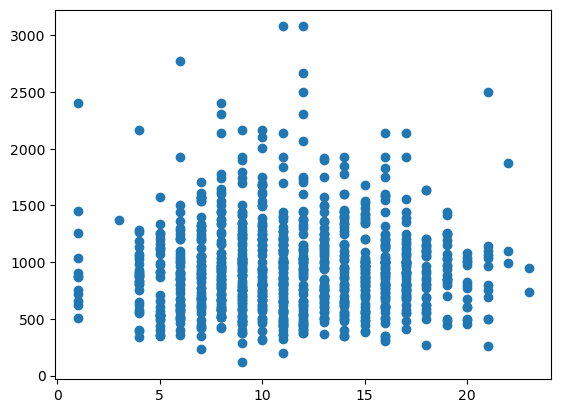

In [7]:
plt.scatter(data.YearsExperience, data.MonthlyEarnings)
plt.show()

<Axes: xlabel='YearsExperience', ylabel='MonthlyEarnings'>

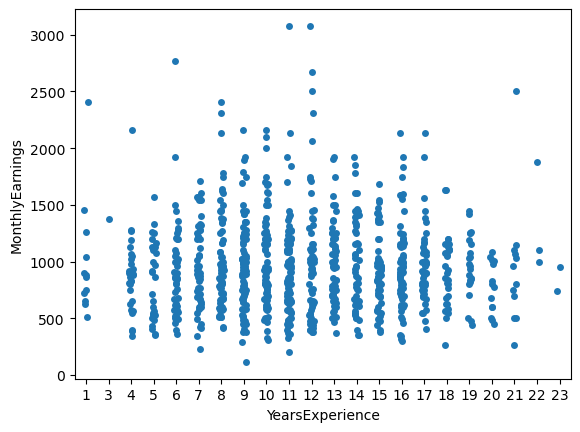

In [8]:
sns.stripplot(data, x='YearsExperience', y='MonthlyEarnings', jitter=True)

In [9]:
#Loss function
def loss_function(m,b,points):
    total_error=0
    for i in range(len(points)):
        x=points.iloc[i].YearsExperience
        y=points.iloc[i].MonthlyEarnings
        total_error+=((y-(m*x+b))**2)
    total_error/float(len(points))

In [10]:
#Gradient Descent
def gradient_descent(m_now,b_now,points,L):
    m_gradient=0
    b_gradient=0
    n=len(points)
    for i in range(n):
        x=points.iloc[i].YearsExperience
        y=points.iloc[i].MonthlyEarnings
        m_gradient += -(2/n)*x*(y-m_now*x+b_now)
        b_gradient += -(2/n)*(y-m_now*x+b_now)
    m=m_now-m_gradient*L
    b=b_now-b_gradient*L
    return m,b

74.71294523452593 29.99630157695965


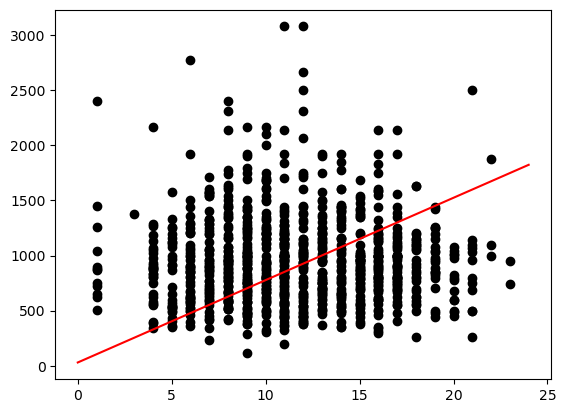

In [16]:
m=0
b=0
L=0.0001
epochs=1000
for i in range(epochs):
    m,b=gradient_descent(m,b,data,L)
print(m,b)
plt.scatter(data.YearsExperience, data.MonthlyEarnings, color='black')
plt.plot(list(range(0,25)), [m*x+b for x in range(0,25)], color='red')
plt.show()